# Free fall

Date: August 4, 2018

In [11]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as sg

matplotlib.rcParams['figure.figsize'] = [16, 5]

SAMPLING_RATE = 80.0
GYRO_RESOLUTION = 250.0 / 32768.0
ACCEL_RESOLUTION = 2.0 / 32768.0
FILE = 'raw_data_gravity.csv'

In [12]:
df = pd.read_csv(FILE, dtype=np.int16)

gres = lambda v: v * GYRO_RESOLUTION
ares = lambda v: v * ACCEL_RESOLUTION
to_time = lambda v: v / SAMPLING_RATE
df[['gx', 'gy', 'gz']] = df[['gx', 'gy', 'gz']].apply(gres)
df[['ax', 'ay', 'az']] = df[['ax', 'ay', 'az']].apply(ares)
df[['cnt']] = df[['cnt']].apply(to_time)
df.set_index('cnt', drop=True, inplace=True)
df.head()

,gx,gy,gz,ax,ay,az
cnt,,,,,,
46.0375,2.990723,9.307861,-4.074097,0.028381,0.044250,1.013306
46.0500,4.104614,1.724243,1.022339,0.026917,0.042236,1.005981
46.0625,9.521484,4.638672,-2.838135,0.028381,0.043579,0.992981
46.0750,14.770508,-0.747681,-3.463745,0.025269,0.052856,0.982666
46.0875,15.197754,0.137329,2.166748,0.023926,0.060120,0.975647


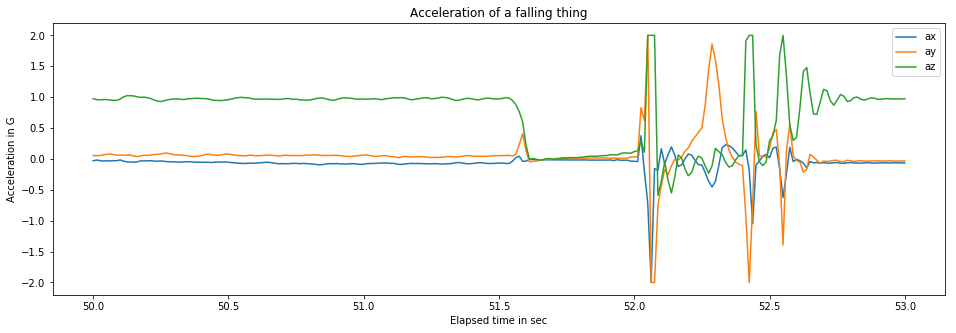

In [13]:
ax_a = df[['ax', 'ay', 'az']][50:53].plot(title='Acceleration of a falling thing')
ax_a.set_xlabel('Elapsed time in sec')
ax_a.set_ylabel('Acceleration in G')
plt.savefig('{}_free_fall.jpg'.format(FILE.split('.')[0]))

$$ v(t) = gt $$

$$ r = \int_{t_0}^{t_1} v(t) dt = \frac{1}{2}g{(t_1 - t_0)}^2
= \frac{1}{2} \times 9.8 \times 0.4 = 0.8 $$